## Statistiques sur les passagers du Titanic


In [3]:
#importations
import pandas as pd    

#initialisation des variables
fichier_passagers = "./Data/Titanic/passengers.csv"
fichier_survie = "./Data/Titanic/survival.csv"

In [4]:
#récupération des dataframes
df_passagers = pd.read_csv(fichier_passagers, encoding='latin1', dtype={'PassengerId': 'int', 'Pclass': 'int', 'Name': 'string', 'Sex': 'string', 'Age': 'Float64', 'Fare': 'Float64'})
df_survie = pd.read_csv(fichier_survie, encoding='latin1', dtype={'PassengerId': 'int', 'Survived': 'boolean'})

display(df_passagers)
display(df_survie)

,PassengerId,Pclass,Name,Sex,Age,Fare
0,1,3,"Braund, Mr. Owen Harris",male,22.0,7.25
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833
2,3,3,"Heikkinen, Miss. Laina",female,26.0,7.925
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1
4,5,3,"Allen, Mr. William Henry",male,35.0,8.05
...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,<NA>,8.05
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,108.9
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,7.25
1307,1308,3,"Ware, Mr. Frederick",male,<NA>,8.05


,PassengerId,Survived
0,1,False
1,2,True
2,3,True
3,4,True
4,5,False
...,...,...
1304,1305,False
1305,1306,True
1306,1307,False
1307,1308,False


In [5]:
# 1 - Joindre les 2 dataframes `df_passagers` et `df_survie`
#df_titanic = df_passagers.join(df_survie, lsuffix='PassengerId', rsuffix='PassengerId')
df_titanic = df_passagers.merge(df_survie, on='PassengerId')
df_titanic

,PassengerId,Pclass,Name,Sex,Age,Fare,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,7.25,False
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,True
2,3,3,"Heikkinen, Miss. Laina",female,26.0,7.925,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1,True
4,5,3,"Allen, Mr. William Henry",male,35.0,8.05,False
...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,<NA>,8.05,False
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,108.9,True
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,7.25,False
1307,1308,3,"Ware, Mr. Frederick",male,<NA>,8.05,False


In [6]:
# 2 - Combien y a t-il de passagers dans notre dataframe ?
nb_passagers = len(df_titanic)
nb_passagers

1309

In [7]:
# 3 - Quelle est la moyenne du prix du trajet ?
moyenne_prix_trajet = df_titanic['Fare'].mean()
moyenne_prix_trajet

33.29547928134557

In [8]:
# 4 - Quels passagers ont payé les billets les plus chers ?
max_prix_trajet = df_titanic['Fare'].max()
df_passagers_ticket_le_plus_cher = df_titanic[df_titanic['Fare'] == max_prix_trajet]
df_passagers_ticket_le_plus_cher

,PassengerId,Pclass,Name,Sex,Age,Fare,Survived
258,259,1,"Ward, Miss. Anna",female,35.0,512.3292,True
679,680,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,512.3292,True
737,738,1,"Lesurer, Mr. Gustave J",male,35.0,512.3292,True
1234,1235,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,512.3292,True


In [9]:
# 5 - Quelles personnes n’ont pas payé leurs billets de 1ère classe ?
df_passagers_billet_premiere_classe_gratuit = df_titanic[(df_titanic['Pclass'] == 1) & (df_titanic['Fare'] == 0)]
df_passagers_billet_premiere_classe_gratuit

,PassengerId,Pclass,Name,Sex,Age,Fare,Survived
263,264,1,"Harrison, Mr. William",male,40.0,0.0,False
633,634,1,"Parr, Mr. William Henry Marsh",male,<NA>,0.0,False
806,807,1,"Andrews, Mr. Thomas Jr",male,39.0,0.0,False
815,816,1,"Fry, Mr. Richard",male,<NA>,0.0,False
822,823,1,"Reuchlin, Jonkheer. John George",male,38.0,0.0,False
1157,1158,1,"Chisholm, Mr. Roderick Robert Crispin",male,<NA>,0.0,False
1263,1264,1,"Ismay, Mr. Joseph Bruce",male,49.0,0.0,False


In [10]:
# 6 - Quelle personne a obtenu le billet de première classe le moins cher ?
df_titanic_classe1 = df_titanic[(df_titanic['Pclass'] == 1) & (df_titanic['Fare'] > 0)]
billet_classe_1_le_moins_cher = df_titanic_classe1['Fare'].min()
df_titanic_classe1[df_titanic_classe1['Fare'] == billet_classe_1_le_moins_cher]

,PassengerId,Pclass,Name,Sex,Age,Fare,Survived
872,873,1,"Carlsson, Mr. Frans Olof",male,33.0,5.0,False


In [11]:
# 7 - Quelle est la personne la plus jeune ? et la personne la plus âgée à bord du Titanic ?
min_age = df_titanic['Age'].min()
max_age = df_titanic['Age'].max()
df_passagers_les_plus_jeunes = df_titanic[df_titanic['Age'] == min_age]
df_passagers_les_plus_vieux = df_titanic[df_titanic['Age'] == max_age]

print(f"La personne la plus jeune est: {df_passagers_les_plus_jeunes['Name'].iloc[0]}")
display(df_passagers_les_plus_jeunes)
print(f"La personne la plus vieille est: {df_passagers_les_plus_vieux['Name'].iloc[0]}")
display(df_passagers_les_plus_vieux)

La personne la plus jeune est: Dean, Miss. Elizabeth Gladys Millvina""


,PassengerId,Pclass,Name,Sex,Age,Fare,Survived
1245,1246,3,"Dean, Miss. Elizabeth Gladys Millvina""""",female,0.17,20.575,True


La personne la plus vieille est: Barkworth, Mr. Algernon Henry Wilson


,PassengerId,Pclass,Name,Sex,Age,Fare,Survived
630,631,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,30.0,True


In [12]:
# 8 - Quel est le prix médian des billets de 1ère, 2ème ou 3ème classe ?
df_prix_median_par_classe = df_titanic.groupby(by='Pclass')['Fare'].median().reset_index()
display(df_prix_median_par_classe)

,Pclass,Fare
0,1,60.0
1,2,15.0458
2,3,8.05


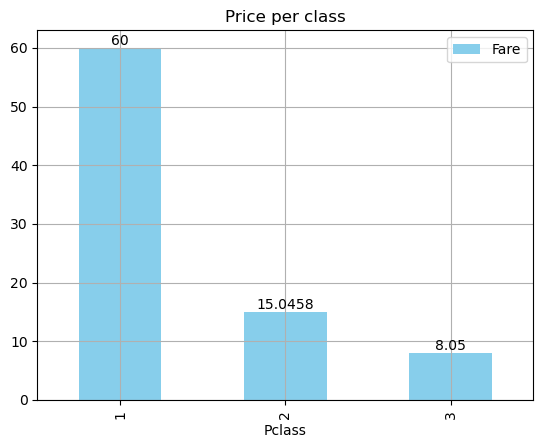

In [13]:
# Affichage du prix median par classe
ax = df_prix_median_par_classe.plot(kind='bar', x='Pclass', y='Fare', color='skyblue', title='Price per class', grid=True)
result = ax.bar_label(ax.containers[0])

In [ ]:
# 9 - Quel est le pourcentage de femmes dans la liste des passagers ?
df_passagers_par_genre = df_titanic.groupby(by='Sex').size().reset_index(name='counts') #.reset_index()
df_passagers_par_genre

In [ ]:
# Quel est le pourcentage de femmes dans la liste des passagers ?
df_passagers_par_genre['percentage'] = 100*df_passagers_par_genre['counts'] / df_passagers_par_genre['counts'].sum()
df_passagers_par_genre

In [ ]:
ax = df_passagers_par_genre.plot(kind='bar', x='Sex', y='percentage', color='skyblue', title='Passagers par genre', grid=True)
result = ax.bar_label(ax.containers[0])

In [ ]:
# 10 - Quelle est la proportion des survivants ?
df_passagers_par_survie = df_titanic.groupby(by='Survived').size().reset_index(name='counts')
df_passagers_par_survie['Pourcentage survivants'] = 100*df_passagers_par_survie['counts'] / df_passagers_par_survie['counts'].sum()
df_passagers_par_survie

In [ ]:
ax = df_passagers_par_survie.plot(kind='bar', x='Survived', y='Pourcentage survivants', color='skyblue', title='Pourcentage survivants', grid=True)
result = ax.bar_label(ax.containers[0])

In [ ]:
# 11 - Quelle est la proportion des survivants par classe de transport ?
df_passagers_survie_par_classe = df_titanic.groupby(by=['Pclass', 'Survived']).size().reset_index(name='counts')
df_passagers_survie_par_classe['Pourcentage survie par classe'] = 100 * df_passagers_survie_par_classe['counts'] / df_passagers_survie_par_classe.groupby('Pclass')['counts'].transform('sum')
df_passagers_survie_par_classe

In [ ]:
ax = df_passagers_survie_par_classe[df_passagers_survie_par_classe['Survived'] == True].plot(kind='bar', x='Pclass', y='Pourcentage survie par classe', color='skyblue', title='Pourcentage survivants', grid=True)
result = ax.bar_label(ax.containers[0])